https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use(['dark_background'])

In [2]:
n = 1000
mu, sigma = 0, 0.1 # mean and standard deviation
x1 = np.random.normal(mu, sigma, n)
x2 = 2 * x1 + np.random.normal(mu, sigma, n)

In [3]:
x1.shape, x2.shape

((1000,), (1000,))

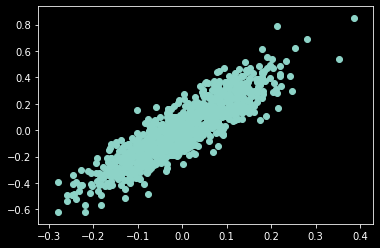

In [4]:
plt.scatter(x1, x2)

In [5]:
mu1 = x1.mean()
mu2 = x2.mean()

In [6]:
covar_x1x2 = (np.sum((x1 - mu1) * (x2 - mu2))) / (n -1) 

In [7]:
covar_x1x2

0.020006537353121443

# Calculate Eigenvectors and eigenvalues of the covariance matrix

1. The eigenvectors are perpendicular to each other
1. Notice one of the eigenvectors goes through the data like a line of best fit
1. The other shows us that the data follows the main line but is off by some amount
1. The eigenvector with the highest eigenvalue is the principal component of the dataset

In [8]:
X = np.stack((x1, x2), axis=0)
covar_x1x2 = np.cov(X) 
print(covar_x1x2)

[[0.0102085  0.02000654]
 [0.02000654 0.04987588]]


In [9]:
e_val, e_vec = np.linalg.eig(covar_x1x2)

In [10]:
e_val, e_vec

(array([0.00187063, 0.05821375]),
 array([[-0.92304723, -0.38468665],
        [ 0.38468665, -0.92304723]]))

In [11]:
e_vec[:,0]@e_vec[:,1] #they are perpendicular

0.0

In [21]:
e_vec[:,1]

array([-0.38468665, -0.92304723])

In [13]:
np.linalg.norm(e_vec[:,0]) #it is a unit vector

0.9999999999999999

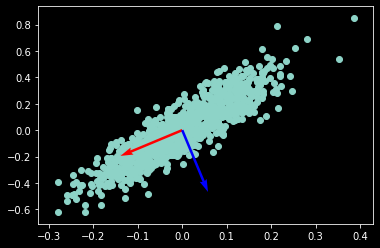

In [14]:
plt.scatter(x1, x2)
plt.quiver(0, 0, e_vec[:,0], e_vec[:,1], color=['r','b','g'], scale=5)
plt.show()

In [15]:
principal_component = e_vec[:, np.argmax(e_val)]
principal_component

array([-0.38468665, -0.92304723])

# Deriving a new dataset

In [16]:
mean_adj_data = X - np.expand_dims(np.array([mu1, mu2]), axis=1)

In [17]:
e_vec.shape

(2, 2)

In [18]:
mean_adj_data.shape

(2, 1000)

In [19]:
final_data = e_vec @ mean_adj_data

In [20]:
final_data

array([[-0.09529565,  0.02089852, -0.01264629, ..., -0.21523692,
         0.27252242,  0.14570986],
       [-0.09759763,  0.00787234, -0.00461107, ..., -0.17930049,
         0.22772151,  0.09788009]])

# Scikit Learn

In [76]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [77]:
iris = datasets.load_iris()

In [78]:
X = iris.data
y = iris.target

In [80]:
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

Explained variance is the proportion of variance along the axis of the components from the dataset

In [81]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261]


In [82]:
print(pca.singular_values_)

[25.09996044  6.01314738  3.41368064]


In [83]:
pca.components_.T[:,-0]

array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ])

In [84]:
X2D = pca.fit_transform(X)

In [85]:
X2D

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

Choosing the right number of components

In [86]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
#how many components will it take before the summed explained variance is greater than 95%
d = np.argmax(cumsum >= 0.95 ) + 1 

In [87]:
d

2

Instead of calculating how many components we want, we ask for how many components will explain 95% of the variance

In [88]:
pca = PCA(n_components=0.95)
X2D = pca.fit_transform(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

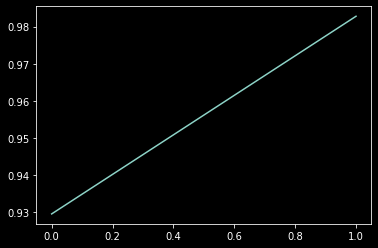

In [89]:
plt.plot(cumsum)

# Discussion

Pitfalls?
1. Standardisation is a must
1. The outputs are harder to interpret 
1. It assumes variance as a proxy for information content - the higher eigenvalues may not necessarily container more information. eg. if you have classes, highest variance does not necessarily make a component necessarily more predictive